# Home Credit Default Risk
### Prepared by Muhammad Naufal Rafi


# Business Understanding

**Latar Belakang**  
Latar belakang case study Home Credit Default Risk dapat diawali dengan fenomena yang terjadi di pasar keuangan saat ini, yaitu semakin ketatnya persaingan dalam industri perbankan dan keuangan. Kondisi ini membuat lembaga keuangan semakin memperketat kriteria pemberian kredit. Oleh karena itu, perusahaan perlu menerapkan metode yang lebih cermat dalam menilai risiko kredit dan mengelola risiko tersebut.

Home Credit adalah sebuah perusahaan multinasional yang bergerak di bidang keuangan, yang menyediakan layanan kredit konsumen untuk pembelian barang-barang rumah tangga dan elektronik, seperti telepon seluler, televisi, dan sebagainya. Home Credit memiliki operasi di berbagai negara di seluruh dunia, termasuk di Indonesia.

Sebagai perusahaan keuangan, Home Credit memiliki risiko kredit yang tinggi karena memberikan kredit kepada konsumen yang memiliki kualifikasi yang berbeda-beda, termasuk yang memiliki catatan kredit buruk atau tidak memiliki catatan kredit sama sekali. Oleh karena itu, Home Credit perlu menerapkan metode yang lebih cermat dalam menilai risiko kredit dan mengelola risiko tersebut.

Salah satu metode yang dapat dilakukan oleh Home Credit adalah dengan menggunakan teknologi data mining dan machine learning untuk mengembangkan model prediksi default risk. Dalam hal ini, model prediksi dapat membantu perusahaan dalam menentukan kelayakan dan risiko pemberian kredit kepada calon nasabah.

Dalam case study Home Credit Default Risk, terdapat dataset yang berisi informasi tentang nasabah yang mengajukan kredit dari Home Credit. Dataset tersebut berisi informasi seperti usia, jenis kelamin, tingkat pendidikan, status pernikahan, dan informasi keuangan lainnya. Dengan menggunakan teknik data mining dan machine learning, Home Credit dapat membangun model prediksi default risk yang akurat dan dapat membantu perusahaan dalam mengambil keputusan kredit yang lebih tepat.

Target:  
`0` : Pembayaran Lancar  
`1` : Pembayaran Terkendala (Default)


**Goals / Tujuan**  
Pernyataan goals untuk case study Home Credit Default Risk yang bertujuan untuk dapat membedakan kelas positif dan negatif dengan baik dengan ROC AUC serta meminimalisir False Negative rate adalah sebagai berikut:

- Membangun model prediksi default risk yang akurat dengan nilai ROC AUC yang tinggi, yaitu di atas 0.70.
- Meminimalisir risiko kredit yang ditanggung oleh perusahaan dengan mengurangi jumlah nasabah yang default pada pinjaman mereka.
- Memperbaiki efisiensi proses kredit yang dihasilkan dengan model prediksi default risk yang akurat, sehingga perusahaan dapat menilai risiko kredit dengan lebih cepat dan efektif.  

Dengan mencapai goals tersebut, Home Credit dapat meningkatkan kinerja dan efisiensi operasi kredit mereka, serta meningkatkan kepercayaan dan loyalitas nasabah dalam menggunakan layanan mereka.

**Metrik Evaluasi**  
- `ROC AUC`: Dalam kasus Home Credit Default Risk, ROC AUC dapat digunakan untuk mengukur seberapa baik model prediksi dapat membedakan antara nasabah yang berisiko default dan yang tidak berisiko default. Semakin tinggi nilai ROC AUC, semakin baik kemampuan model dalam membedakan kelas positif dan negatif.
    Oleh karena itu, ROC AUC merupakan metrik evaluasi yang penting dalam kasus Home Credit Default Risk, karena dapat membantu perusahaan dalam memilih model prediksi default risk yang terbaik dan dapat meminimalkan risiko kredit yang ditanggung oleh perusahaan.
    
- `False Negative Rate`: Metrik evaluasi yang dapat digunakan untuk mengukur kinerja model dalam memprediksi nasabah yang sebenarnya berisiko default namun diprediksi tidak berisiko default oleh model. False Negative Rate menghitung persentase dari jumlah nasabah yang sebenarnya berisiko default namun diprediksi tidak berisiko default oleh model dibandingkan dengan total jumlah nasabah yang berisiko default. Hal ini perlu diminimalisir untuk mengurangi kerugian pada pihak perusahaan akibat default yang tidak terdeteksi oleh model prediksi. Dalam kasus Home Credit Default Risk, False Negative Rate menjadi metrik evaluasi yang penting untuk diperhatikan, karena dapat membantu perusahaan untuk mengurangi risiko kredit yang diambil dan meningkatkan kepercayaan nasabah.

Sehingga dengan demikian evaluasi metriks yang akan diprioritaskan pada kasus ini adalah ROC AUC dan juga Recall.

In [1]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_predict, train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler

from sklearn.compose import ColumnTransformer
import category_encoders as ce

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV


from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler


from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve


from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

Ada tujuh file data yang berbeda dalam dataset ini, yaitu:

1. `application_{train|test}.csv`: Ini adalah file utama yang berisi informasi tentang setiap aplikasi pinjaman, termasuk variabel target (apakah pinjaman tersebut dibayar kembali atau tidak).

2. `bureau.csv`: File ini berisi informasi tentang data kredit dari lembaga kredit untuk setiap pelanggan.

3. `bureau_balance.csv`: File ini berisi snapshot saldo bulanan dari transaksi kredit sebelumnya dari data lembaga kredit.

4. `previous_application.csv`: File ini berisi informasi tentang pinjaman sebelumnya di Home Credit dari setiap pelanggan.

5. `POS_CASH_balance.csv`: File ini berisi snapshot saldo bulanan dari pinjaman POS (titik penjualan) dan tunai sebelumnya dari Home Credit.

6. `credit_card_balance.csv`: File ini berisi snapshot saldo bulanan dari pinjaman kartu kredit sebelumnya dari Home Credit.

7. `installments_payments.csv`: File ini berisi riwayat pembayaran untuk pinjaman sebelumnya di Home Credit.

Setiap file ini memiliki beberapa kolom, dan mereka dapat dihubungkan menggunakan kolom SK_ID_CURR dan SK_ID_PREV untuk membuat dataset komprehensif untuk analisis.

In [2]:
# Load Data
application = pd.read_csv('application_train.csv')
bureau = pd.read_csv('bureau.csv')
prev_app = pd.read_csv('previous_application.csv')
pos_cash = pd.read_csv('POS_CASH_balance.csv')
cred_card = pd.read_csv('credit_card_balance.csv')
installment = pd.read_csv('installments_payments.csv')

## Data Application

File application_{train|test}.csv adalah file data utama dalam dataset Home Credit Default Risk, dan berisi informasi tentang setiap aplikasi pinjaman, termasuk variabel target yang menunjukkan apakah pinjaman tersebut dilunasi atau tidak.

Berdasarkan pengetahuan domain dan analisis sebelumnya terhadap dataset, fitur/kolom berikut umumnya dianggap memiliki dampak signifikan pada variabel target:

- `EXT_SOURCE_1, EXT_SOURCE_2, dan EXT_SOURCE_3`: Ini adalah skor kredit eksternal yang disediakan oleh lembaga kredit. Mereka adalah variabel numerik yang mewakili seberapa kreditable peminjam berdasarkan riwayat kredit mereka. Skor yang lebih tinggi menunjukkan risiko default yang lebih rendah.
- `AMT_INCOME_TOTAL`: Ini adalah total pendapatan pemohon. Ini adalah variabel numerik yang diharapkan memiliki korelasi positif dengan kemampuan untuk melunasi pinjaman.
- `AMT_CREDIT`: Ini adalah jumlah total kredit yang diajukan. Ini adalah variabel numerik yang diharapkan memiliki korelasi positif dengan risiko default.
- `NAME_EDUCATION_TYPE`: Ini adalah tingkat pendidikan tertinggi yang dicapai oleh pemohon. Ini adalah variabel kategorikal yang diharapkan memiliki korelasi negatif dengan risiko default.
- `NAME_INCOME_TYPE`: Ini adalah jenis penghasilan yang dimiliki oleh pemohon. Ini adalah variabel kategorikal yang diharapkan memiliki dampak pada kemampuan untuk melunasi pinjaman.
- `DAYS_EMPLOYED`: Ini adalah jumlah hari pemohon bekerja. Ini adalah variabel numerik yang diharapkan memiliki dampak pada kemampuan untuk melunasi pinjaman.

In [3]:
df_application = application[['SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_EDUCATION_TYPE',
                    'NAME_INCOME_TYPE', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE', 'AMT_GOODS_PRICE',
                    'NAME_FAMILY_STATUS', 'FLAG_OWN_REALTY', 'TARGET']].copy()

In [4]:
df_application.head()

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,AMT_GOODS_PRICE,NAME_FAMILY_STATUS,FLAG_OWN_REALTY,TARGET
0,100002,0.083037,0.262949,0.139376,202500.0,406597.5,Secondary / secondary special,Working,-637,0.018801,Laborers,351000.0,Single / not married,Y,1
1,100003,0.311267,0.622246,NaN,270000.0,1293502.5,Higher education,State servant,-1188,0.003541,Core staff,1129500.0,Married,N,0
2,100004,NaN,0.555912,0.729567,67500.0,135000.0,Secondary / secondary special,Working,-225,0.010032,Laborers,135000.0,Single / not married,Y,0
3,100006,NaN,0.650442,NaN,135000.0,312682.5,Secondary / secondary special,Working,-3039,0.008019,Laborers,297000.0,Civil marriage,Y,0
4,100007,NaN,0.322738,NaN,121500.0,513000.0,Secondary / secondary special,Working,-3038,0.028663,Core staff,513000.0,Single / not married,Y,0


## Data Bureau

File bureau.csv berisi data dari biro kredit tentang pinjaman sebelumnya yang diambil oleh pelamar dalam file application_{train|test}.csv. Untuk menggabungkan kedua set data, kita dapat menggunakan kolom SK_ID_CURR sebagai kunci yang sama. Berikut adalah beberapa fitur/kolom tambahan dari file bureau.csv yang mungkin berguna untuk penggabungan dan analisis:

- `K_ID_CURR`: ID pelamar dari file application_{train|test}.csv.
- `DAYS_CREDIT`: Jumlah hari sebelum aplikasi saat ini bahwa pinjaman diambil.
- `DAYS_CREDIT_ENDDATE`: Jumlah hari sebelum aplikasi saat ini bahwa biro kredit mengharapkan pinjaman berakhir.
- `CREDIT_DAY_OVERDUE`: Jumlah hari setelah tanggal jatuh tempo yang diharapkan bahwa pinjaman telat.
- `AMT_CREDIT_SUM`: Total jumlah pinjaman yang diambil.
- `CEDIT_TYPE`: Jenis pinjaman yang diambil.

In [5]:
df_bureau = bureau[['SK_ID_CURR', 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'CREDIT_DAY_OVERDUE', 'AMT_CREDIT_SUM', 'CREDIT_TYPE']].copy()
df_bureau.head()

,SK_ID_CURR,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM,CREDIT_TYPE
0,215354,-497,-153.0,0,91323.0,Consumer credit
1,215354,-208,1075.0,0,225000.0,Credit card
2,215354,-203,528.0,0,464323.5,Consumer credit
3,215354,-203,NaN,0,90000.0,Credit card
4,215354,-629,1197.0,0,2700000.0,Consumer credit


## Data Previous Application

File previous_application.csv berisi informasi tentang aplikasi pinjaman sebelumnya yang dibuat oleh pelamar di file application_{train|test}.csv. Berikut adalah beberapa kolom/fitur penting dari file previous_application.csv yang perlu Anda ketahui:

- `SK_ID_CURR`: ID pelamar dari file application_{train|test}.csv.
- `DAYS_DECISION`: Jumlah hari dari aplikasi hingga keputusan.
- `NAME_CLIENT_TYPE`: Apakah pelanggan adalah pelanggan lama atau baru saat mengajukan aplikasi sebelumnya.
- `CHANNEL_TYPE`: Melalui saluran apa kami mendapatkan klien pada aplikasi sebelumnya.
- `CNT_PAYMENT`: Jangka waktu kredit sebelumnya pada saat aplikasi sebelumnya.

In [6]:
df_prev_app = prev_app[['SK_ID_CURR', 'DAYS_DECISION', 'NAME_CLIENT_TYPE', 'CHANNEL_TYPE', 'CNT_PAYMENT']].copy()
df_prev_app.head()

,SK_ID_CURR,DAYS_DECISION,NAME_CLIENT_TYPE,CHANNEL_TYPE,CNT_PAYMENT
0,271877,-73,Repeater,Country-wide,12.0
1,108129,-164,Repeater,Contact center,36.0
2,122040,-301,Repeater,Credit and cash offices,12.0
3,176158,-512,Repeater,Credit and cash offices,12.0
4,202054,-781,Repeater,Credit and cash offices,24.0


## Data Posh Cash

File POS_CASH_balance.csv berisi informasi tentang pinjaman POS (Point of Sales) dan tunai sebelumnya dari pelamar dalam file application_{train|test}.csv. Berikut adalah beberapa kolom / fitur penting dari file POS_CASH_balance.csv yang perlu Anda ketahui:

- `SK_ID_CURR`: ID pelamar dari file application_{train|test}.csv.
- `CNT_INSTALMENT`: Jangka waktu kredit sebelumnya (dapat berubah seiring waktu).
- `SK_DPD`: Hari tertunda selama bulan kredit sebelumnya.

In [7]:
df_pos_cash = pos_cash[['SK_ID_CURR', 'CNT_INSTALMENT', 'SK_DPD']].copy()
df_pos_cash.head()

,SK_ID_CURR,CNT_INSTALMENT,SK_DPD
0,182943,48.0,0
1,367990,36.0,0
2,397406,12.0,0
3,269225,48.0,0
4,334279,36.0,0


## Data Credit Card

file credit_card_balance.csv berisi informasi tentang pinjaman kartu kredit sebelumnya dari pelamar di dalam berkas application_{train|test}.csv. Berikut beberapa kolom / fitur penting dari berkas credit_card_balance.csv yang perlu Anda ketahui:

- `SK_ID_CURR`: ID pelamar dari berkas application_{train|test}.csv.
- `AMT_BALANCE`: Saldo selama bulan kredit sebelumnya.
- `AMT_DRAWINGS_CURRENT`: Jumlah yang ditarik selama bulan kredit sebelumnya.
- `AMT_PAYMENT_TOTAL_CURRENT`: Jumlah total yang dibayarkan untuk kredit sebelumnya.

In [8]:
df_cred_card = cred_card[['SK_ID_CURR', 'AMT_BALANCE', 'AMT_PAYMENT_TOTAL_CURRENT']].copy()
df_cred_card.head()

,SK_ID_CURR,AMT_BALANCE,AMT_PAYMENT_TOTAL_CURRENT
0,378907,56.970,1800.0
1,363914,63975.555,2250.0
2,371185,31815.225,2250.0
3,337855,236572.110,11925.0
4,126868,453919.455,27000.0


## Data Installment

File installments_payments.csv berisi informasi tentang pembayaran kembali pinjaman sebelumnya dari pelamar pada file application_{train|test}.csv. Berikut beberapa kolom/fitur penting dari file installments_payments.csv yang perlu diketahui:

- `SK_ID_CURR`: ID pelamar dari file application_{train|test}.csv.
- `AMT_INSTALMENT`: Jumlah pembayaran angsuran untuk pinjaman sebelumnya.
- `AMT_PAYMENT`: Jumlah yang benar-benar dibayarkan oleh pelanggan pada pembayaran angsuran sebelumnya dari pinjaman.

In [9]:
df_installment = installment[['SK_ID_CURR', 'AMT_INSTALMENT', 'AMT_PAYMENT']].copy()
df_installment.head()

,SK_ID_CURR,AMT_INSTALMENT,AMT_PAYMENT
0,161674,6948.360,6948.360
1,151639,1716.525,1716.525
2,193053,25425.000,25425.000
3,199697,24350.130,24350.130
4,167756,2165.040,2160.585


## Merge the Data

Setelah memilih data berdasarkan domain knowledge, kita akan menggabungkannya menjadi satu data, kemudian melakukan proses manipulasi dan pembersihan data.

In [10]:
# Merge application and bureau data
data = df_application.merge(df_bureau, on='SK_ID_CURR', how='inner')
data.drop_duplicates(subset='SK_ID_CURR', keep='last', inplace=True)

In [11]:
# Merge previous application data
data = data.merge(df_prev_app, on='SK_ID_CURR', how='inner')
data.drop_duplicates(subset='SK_ID_CURR', keep='last', inplace=True)

In [12]:
# Merge POS_CASH_balance data
data = data.merge(df_pos_cash, on='SK_ID_CURR', how='inner')
data.drop_duplicates(subset='SK_ID_CURR', keep='last', inplace=True)

In [13]:
# Merge credit card balance data
data = data.merge(df_cred_card, on='SK_ID_CURR', how='inner')
data.drop_duplicates(subset='SK_ID_CURR', keep='last', inplace=True)

In [14]:
# Merge installment payment data
data = data.merge(df_installment, on='SK_ID_CURR', how='inner')
data.drop_duplicates(subset='SK_ID_CURR', keep='last', inplace=True)

In [15]:
data

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,...,DAYS_DECISION,NAME_CLIENT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,CNT_INSTALMENT,SK_DPD,AMT_BALANCE,AMT_PAYMENT_TOTAL_CURRENT,AMT_INSTALMENT,AMT_PAYMENT
129,100011,0.587334,0.205747,0.751724,112500.0,1019610.0,Secondary / secondary special,Pensioner,365243,0.018634,...,-1189,Repeater,Credit and cash offices,30.0,12.0,284,166628.160,9000.000,9000.000,9000.000
155,100023,NaN,0.586617,0.477649,90000.0,544491.0,Higher education,State servant,-2038,0.015221,...,-327,Refreshed,AP+ (Cash loan),0.0,14.0,0,0.000,0.000,8519.130,8519.130
167,100036,0.274422,0.627300,NaN,112500.0,512064.0,Secondary / secondary special,Working,-1104,0.008575,...,-39,Repeater,Credit and cash offices,NaN,12.0,0,0.000,0.000,6551.415,6551.415
244,100043,0.842763,0.681699,0.754406,198000.0,641173.5,Secondary / secondary special,Commercial associate,-768,0.018850,...,-997,Repeater,Country-wide,0.0,60.0,0,0.000,0.000,10363.275,10363.275
264,100047,NaN,0.306841,0.320163,202500.0,1193580.0,Secondary / secondary special,Commercial associate,-1262,0.025164,...,-1172,Repeater,Credit and cash offices,36.0,24.0,0,0.000,0.000,11117.700,11117.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5450493,456241,0.251096,0.651306,0.524496,180000.0,270126.0,Secondary / secondary special,Working,-1222,0.007020,...,-259,Repeater,Credit and cash offices,60.0,24.0,0,0.000,0.000,6574.815,6574.815
5450545,456242,NaN,0.746259,0.406617,198000.0,1312110.0,Secondary / secondary special,Commercial associate,-3689,0.072508,...,-734,New,Country-wide,12.0,10.0,0,182003.265,45212.265,14532.075,14532.075
5450678,456244,0.896042,0.789389,0.337673,261000.0,1303812.0,Higher education,Working,-5326,0.031329,...,-2150,New,Credit and cash offices,12.0,6.0,3,0.000,154.260,4090.950,4090.950
5450711,456246,NaN,0.313334,0.735221,94500.0,225000.0,Secondary / secondary special,Working,-8736,0.010966,...,-278,Refreshed,AP+ (Cash loan),0.0,6.0,0,52.875,15750.000,240.390,240.390


In [16]:
data.isna().sum()/len(data)*100

SK_ID_CURR                     0.000000
EXT_SOURCE_1                  53.535367
EXT_SOURCE_2                   0.027475
EXT_SOURCE_3                   6.320663
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_INCOME_TYPE               0.000000
DAYS_EMPLOYED                  0.000000
REGION_POPULATION_RELATIVE     0.000000
OCCUPATION_TYPE               28.276071
AMT_GOODS_PRICE                0.008243
NAME_FAMILY_STATUS             0.000000
FLAG_OWN_REALTY                0.000000
TARGET                         0.000000
DAYS_CREDIT                    0.000000
DAYS_CREDIT_ENDDATE            9.403377
CREDIT_DAY_OVERDUE             0.000000
AMT_CREDIT_SUM                 0.000000
CREDIT_TYPE                    0.000000
DAYS_DECISION                  0.000000
NAME_CLIENT_TYPE               0.000000
CHANNEL_TYPE                   0.000000
CNT_PAYMENT                   18.809501
CNT_INSTALMENT                 0.556372


Data ini memiliki ukuran 72793 baris dan 30 kolom, namun terdapat banyak nilai yang hilang. Oleh karena itu, data yang mengandung nilai yang hilang akan dihapus saja. Hal ini dikarenakan dengan menggunakan data yang masih tersedia, sudah cukup untuk melakukan pembuatan model.

## Cleaning & Manipulation

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72793 entries, 129 to 5450845
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  72793 non-null  int64  
 1   EXT_SOURCE_1                33823 non-null  float64
 2   EXT_SOURCE_2                72773 non-null  float64
 3   EXT_SOURCE_3                68192 non-null  float64
 4   AMT_INCOME_TOTAL            72793 non-null  float64
 5   AMT_CREDIT                  72793 non-null  float64
 6   NAME_EDUCATION_TYPE         72793 non-null  object 
 7   NAME_INCOME_TYPE            72793 non-null  object 
 8   DAYS_EMPLOYED               72793 non-null  int64  
 9   REGION_POPULATION_RELATIVE  72793 non-null  float64
 10  OCCUPATION_TYPE             52210 non-null  object 
 11  AMT_GOODS_PRICE             72787 non-null  float64
 12  NAME_FAMILY_STATUS          72793 non-null  object 
 13  FLAG_OWN_REALTY            

In [18]:
data.dropna(inplace=True)

In [19]:
data.drop(columns='SK_ID_CURR', inplace=True)

Kita akan menghapus kolom SK_ID_CURR karena kolom tersebut hanya berisi nilai unik dan tidak akan memberikan pengaruh apapun terhadap pembuatan model.

In [20]:
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED']*-1/365
data['DAYS_EMPLOYED'] = np.floor(data['DAYS_EMPLOYED'])
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].astype('int')
data.columns = data.columns.str.replace('DAYS_EMPLOYED', 'YEARS_EMPLOYED')

In [21]:
data['DAYS_DECISION'] = data['DAYS_DECISION']*-1/365
data['DAYS_DECISION'] = np.floor(data['DAYS_DECISION'])
data['DAYS_DECISION'] = data['DAYS_DECISION'].astype('int')
data.columns = data.columns.str.replace('DAYS_DECISION', 'YEARS_DECISION')

In [22]:
data['DAYS_CREDIT_ENDDATE'] = data['DAYS_CREDIT_ENDDATE']*-1/365
data['DAYS_CREDIT_ENDDATE'] = np.floor(data['DAYS_CREDIT_ENDDATE'])
data['DAYS_CREDIT_ENDDATE'] = data['DAYS_CREDIT_ENDDATE'].astype('int')
data.columns = data.columns.str.replace('DAYS_CREDIT_ENDDATE', 'YEARS_CREDIT_ENDDATE')

In [23]:
data['DAYS_CREDIT'] = data['DAYS_CREDIT']*-1/365
data['DAYS_CREDIT'] = np.floor(data['DAYS_CREDIT'])
data['DAYS_CREDIT'] = data['DAYS_CREDIT'].astype('int')
data.columns = data.columns.str.replace('DAYS_CREDIT', 'YEARS_CREDIT')

Di sini, kami akan mengonversi format beberapa variabel yang ada ke dalam satuan tahun.





In [24]:
data

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,YEARS_EMPLOYED,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,...,YEARS_DECISION,NAME_CLIENT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,CNT_INSTALMENT,SK_DPD,AMT_BALANCE,AMT_PAYMENT_TOTAL_CURRENT,AMT_INSTALMENT,AMT_PAYMENT
244,0.842763,0.681699,0.754406,198000.0,641173.5,Secondary / secondary special,Commercial associate,2,0.018850,Private service staff,...,2,Repeater,Country-wide,0.0,60.0,0,0.00,0.00,10363.275,10363.275
389,0.468208,0.674203,0.399676,135000.0,288873.0,Secondary / secondary special,Working,9,0.007305,Sales staff,...,1,Repeater,AP+ (Cash loan),0.0,10.0,0,133348.95,211.86,7801.155,7801.155
424,0.311510,0.713355,0.309275,540000.0,675000.0,Higher education,Commercial associate,19,0.026392,Managers,...,1,Repeater,Stone,12.0,6.0,0,0.00,0.00,5621.355,5621.355
596,0.357707,0.686505,0.394495,180000.0,450000.0,Higher education,Commercial associate,7,0.018850,Laborers,...,2,Repeater,Channel of corporate sales,48.0,4.0,0,0.00,0.00,69.390,69.390
631,0.270766,0.707126,0.597192,103500.0,573628.5,Secondary / secondary special,Working,2,0.009657,Laborers,...,2,Refreshed,Credit and cash offices,0.0,10.0,0,0.00,0.00,6046.560,6046.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449239,0.505346,0.575246,0.479449,382500.0,745429.5,Secondary / secondary special,State servant,0,0.007020,Security staff,...,1,Repeater,Country-wide,10.0,10.0,0,0.00,0.00,3584.160,3584.160
5449413,0.585450,0.264486,0.565608,90000.0,258709.5,Secondary / secondary special,Working,5,0.020246,High skill tech staff,...,2,Repeater,Contact center,0.0,11.0,0,233324.55,19350.00,9315.450,9315.450
5449610,0.634729,0.583214,0.424130,144000.0,1303200.0,Higher education,Working,6,0.007330,Laborers,...,2,Repeater,Credit and cash offices,18.0,12.0,0,0.00,0.00,574.470,574.470
5450134,0.532858,0.561158,0.716570,90000.0,1078200.0,Secondary / secondary special,Commercial associate,5,0.019101,Drivers,...,0,Repeater,Stone,0.0,12.0,0,0.00,0.00,4787.550,4787.550


In [25]:
data.to_csv('data.csv', index=False)

Data yang telah dimanipulasi sebelumnya akan kita save ke file csv

In [26]:
df = data.copy()

# Quick EDA

In [27]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,EXT_SOURCE_1,float64,0,0.0,17196,"[0.8427634659543568, 0.4682080567974757, 0.311..."
1,EXT_SOURCE_2,float64,0,0.0,15904,"[0.6816988025574287, 0.6742032101473874, 0.713..."
2,EXT_SOURCE_3,float64,0,0.0,664,"[0.7544061731797895, 0.3996756156233169, 0.309..."
3,AMT_INCOME_TOTAL,float64,0,0.0,313,"[198000.0, 135000.0, 540000.0, 180000.0, 10350..."
4,AMT_CREDIT,float64,0,0.0,2626,"[641173.5, 288873.0, 675000.0, 450000.0, 57362..."
5,NAME_EDUCATION_TYPE,object,0,0.0,5,"[Secondary / secondary special, Higher educati..."
6,NAME_INCOME_TYPE,object,0,0.0,3,"[Commercial associate, Working, State servant]"
7,YEARS_EMPLOYED,int32,0,0.0,41,"[2, 9, 19, 7, 18, 11, 23, 13, 15, 12, 3, 4, 8,..."
8,REGION_POPULATION_RELATIVE,float64,0,0.0,79,"[0.01885, 0.007305, 0.026392, 0.00965699999999..."
9,OCCUPATION_TYPE,object,0,0.0,18,"[Private service staff, Sales staff, Managers,..."


Tabel di atas menunjukkan beberapa fitur (features) dari sebuah dataset, termasuk jenis data (dataType), jumlah nilai null (null), persentase nilai null (nullPct), jumlah nilai unik (unique), dan contoh nilai unik (uniqueSample). Fitur-fitur tersebut meliputi informasi tentang sumber eksternal pelamar, jumlah pendapatan, jenis pendidikan dan pekerjaan, serta sejumlah variabel terkait kredit dan pembayaran. Dataset ini digunakan untuk melakukan analisis kredit untuk mengidentifikasi pelamar yang layak untuk menerima kredit dan pelamar yang berisiko tinggi dalam pengembalian kredit.

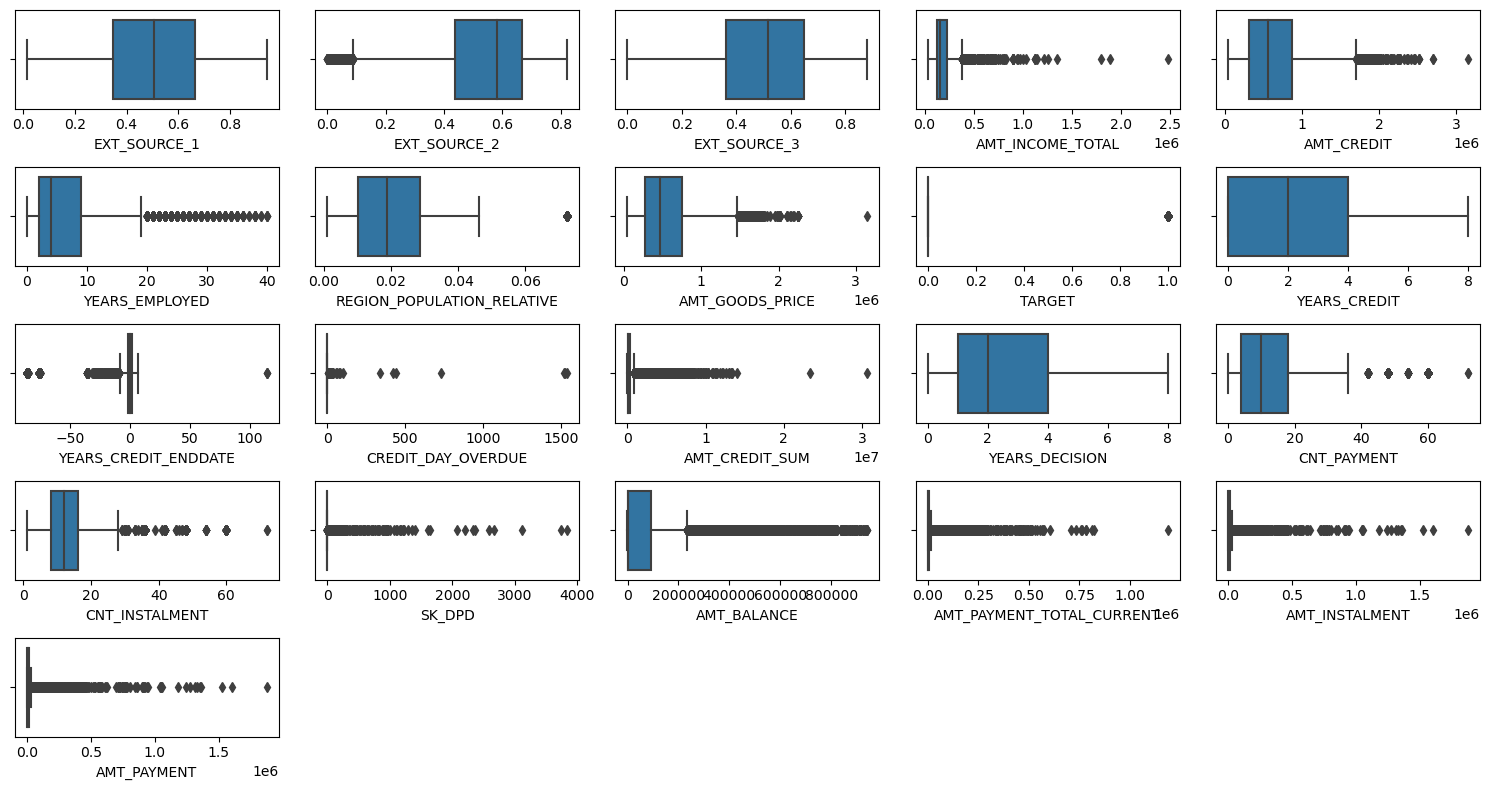

In [28]:
plt.figure(figsize=(15,8))

plotnumber = 1
for kolom in df.describe().columns:

    plt.subplot(5,5, plotnumber)
    sns.boxplot(data=df, x=kolom)

    plotnumber += 1
    
plt.tight_layout()

Gambar diatas terdiri dari 25 subplots (5 baris dan 5 kolom) dan setiap subplot berisi sebuah boxplot yang menampilkan distribusi data dari kolom-kolom numerik di dataframe df.

Dari gambar diatas didapatkan informasi bahwa persebaran data terlihat tidak terdistribusi dengan normal dan satuan dari masing masing variabel terlihat jelas terdapat gap yang cukup besar antar variabel sehingga dengan demikian kita perlu melakukan normalisasi terhadap data numerik ini.

In [29]:
df.TARGET.value_counts(normalize=True)

0    0.926464
1    0.073536
Name: TARGET, dtype: float64

In [30]:
df.describe(include='object')

,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_FAMILY_STATUS,FLAG_OWN_REALTY,CREDIT_TYPE,NAME_CLIENT_TYPE,CHANNEL_TYPE
count,17556,17556,17556,17556,17556,17556,17556,17556
unique,5,3,18,5,2,9,4,8
top,Secondary / secondary special,Working,Laborers,Married,Y,Consumer credit,Repeater,Country-wide
freq,11766,10775,4200,12075,12209,13805,12900,6193


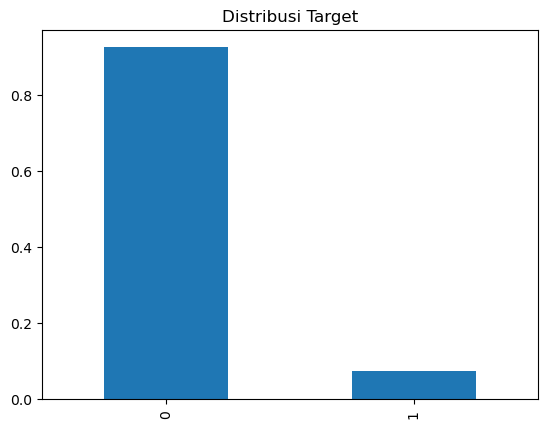

In [31]:
df.TARGET.value_counts(normalize=True).plot(kind='bar')
plt.title('Distribusi Target');

Dari informasi diatas didapatkan bahwa proporsi target tidak seimbang, dimana proporsi `default` hanya sebesar 8.3% sedangkan proporsi tidak `default` sebesar 91.6%

In [32]:
len(df)

17556

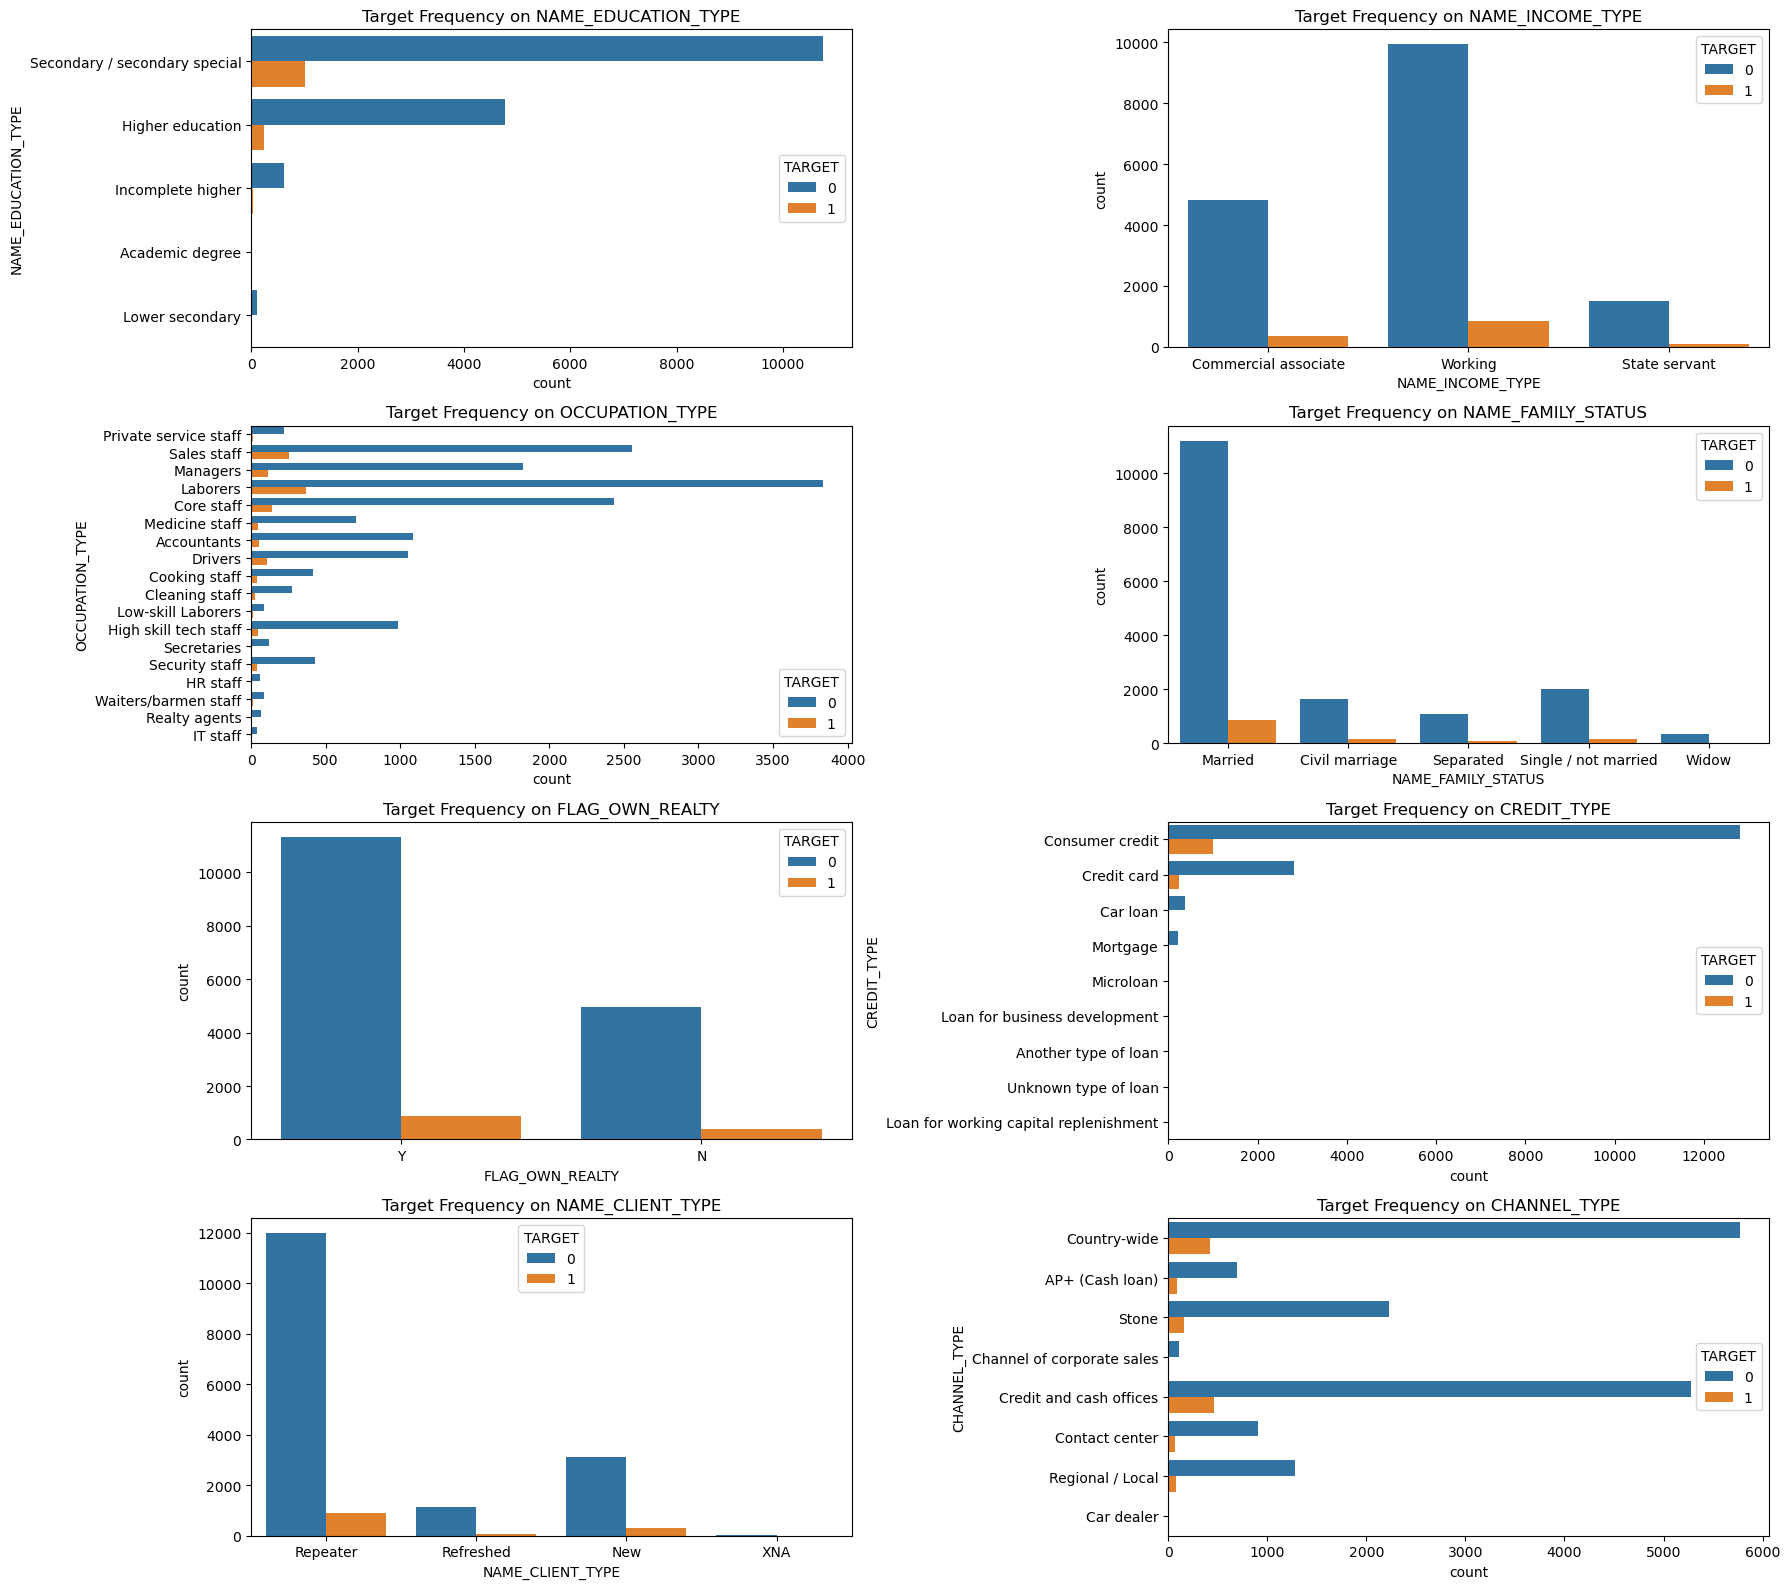

In [33]:
fig, axes = plt.subplots(4, 2, figsize=(18,16))

sns.countplot(data=df, y='NAME_EDUCATION_TYPE', hue='TARGET', ax=axes[0,0]).set_title('Target Frequency on NAME_EDUCATION_TYPE')
sns.countplot(data=df, x='NAME_INCOME_TYPE', hue='TARGET', ax=axes[0,1]).set_title('Target Frequency on NAME_INCOME_TYPE')
sns.countplot(data=df, y='OCCUPATION_TYPE', hue='TARGET', ax=axes[1,0]).set_title('Target Frequency on OCCUPATION_TYPE')
sns.countplot(data=df, x='NAME_FAMILY_STATUS', hue='TARGET', ax=axes[1,1]).set_title('Target Frequency on NAME_FAMILY_STATUS')
sns.countplot(data=df, x='FLAG_OWN_REALTY', hue='TARGET', ax=axes[2,0]).set_title('Target Frequency on FLAG_OWN_REALTY')
sns.countplot(data=df, y='CREDIT_TYPE', hue='TARGET', ax=axes[2,1]).set_title('Target Frequency on CREDIT_TYPE')
sns.countplot(data=df, x='NAME_CLIENT_TYPE', hue='TARGET', ax=axes[3,0]).set_title('Target Frequency on NAME_CLIENT_TYPE')
sns.countplot(data=df, y='CHANNEL_TYPE', hue='TARGET', ax=axes[3,1]).set_title('Target Frequency on CHANNEL_TYPE')


plt.tight_layout()


# Data Preprocessing

In [34]:
X = df.drop(columns= ['TARGET', 'YEARS_CREDIT_ENDDATE'])
y = df['TARGET']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2023, test_size=0.2)

In [36]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

14044 14044
3512 3512


In [37]:
X.describe().columns

Index(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'YEARS_EMPLOYED', 'REGION_POPULATION_RELATIVE',
       'AMT_GOODS_PRICE', 'YEARS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'AMT_CREDIT_SUM', 'YEARS_DECISION', 'CNT_PAYMENT', 'CNT_INSTALMENT',
       'SK_DPD', 'AMT_BALANCE', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_INSTALMENT',
       'AMT_PAYMENT'],
      dtype='object')

In [38]:
X.describe(include='object').columns

Index(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
       'NAME_FAMILY_STATUS', 'FLAG_OWN_REALTY', 'CREDIT_TYPE',
       'NAME_CLIENT_TYPE', 'CHANNEL_TYPE'],
      dtype='object')

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

education_map = [{'col': 'NAME_EDUCATION_TYPE', 
                  'mapping': {None: 0, 'Lower secondary': 1, 'Secondary / secondary special': 2, 'Incomplete higher': 3, 
                              'Higher education': 4, 'Academic degree': 5}
                     }]

# fit the transformer to the data and select the top k features based on chi-square test
transformer = ColumnTransformer([
    ('scaler', MinMaxScaler(), ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_INCOME_TOTAL',
                                'AMT_CREDIT', 'YEARS_EMPLOYED', 'REGION_POPULATION_RELATIVE',
                                'AMT_GOODS_PRICE', 'YEARS_CREDIT', 'CREDIT_DAY_OVERDUE',
                                'AMT_CREDIT_SUM', 'YEARS_DECISION', 'CNT_PAYMENT', 'CNT_INSTALMENT',
                                'SK_DPD', 'AMT_BALANCE', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_INSTALMENT',
                                'AMT_PAYMENT']),
    ('onehot', OneHotEncoder(drop='first'), ['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
                                             'NAME_FAMILY_STATUS', 'FLAG_OWN_REALTY', 'CREDIT_TYPE',
                                             'NAME_CLIENT_TYPE', 'CHANNEL_TYPE'])
], remainder='passthrough')

In [40]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

In [41]:
selector = SelectKBest(score_func=chi2, k=25)
X_train_transformed = transformer.fit_transform(X_train)
X_train_selected = selector.fit_transform(X_train_transformed, y_train)

In [42]:
selected_features = transformer.get_feature_names_out()[selector.get_support()]
selected_features

array(['scaler__EXT_SOURCE_1', 'scaler__EXT_SOURCE_2',
       'scaler__EXT_SOURCE_3', 'scaler__YEARS_EMPLOYED',
       'scaler__REGION_POPULATION_RELATIVE', 'scaler__YEARS_CREDIT',
       'scaler__YEARS_DECISION', 'scaler__CNT_PAYMENT',
       'scaler__AMT_BALANCE',
       'onehot__NAME_EDUCATION_TYPE_Higher education',
       'onehot__NAME_EDUCATION_TYPE_Incomplete higher',
       'onehot__NAME_EDUCATION_TYPE_Secondary / secondary special',
       'onehot__NAME_INCOME_TYPE_State servant',
       'onehot__NAME_INCOME_TYPE_Working',
       'onehot__OCCUPATION_TYPE_Cooking staff',
       'onehot__OCCUPATION_TYPE_Core staff',
       'onehot__OCCUPATION_TYPE_Drivers',
       'onehot__OCCUPATION_TYPE_High skill tech staff',
       'onehot__OCCUPATION_TYPE_Laborers',
       'onehot__OCCUPATION_TYPE_Managers',
       'onehot__OCCUPATION_TYPE_Sales staff',
       'onehot__CREDIT_TYPE_Loan for working capital replenishment',
       'onehot__CREDIT_TYPE_Microloan', 'onehot__CREDIT_TYPE_Mortgage'

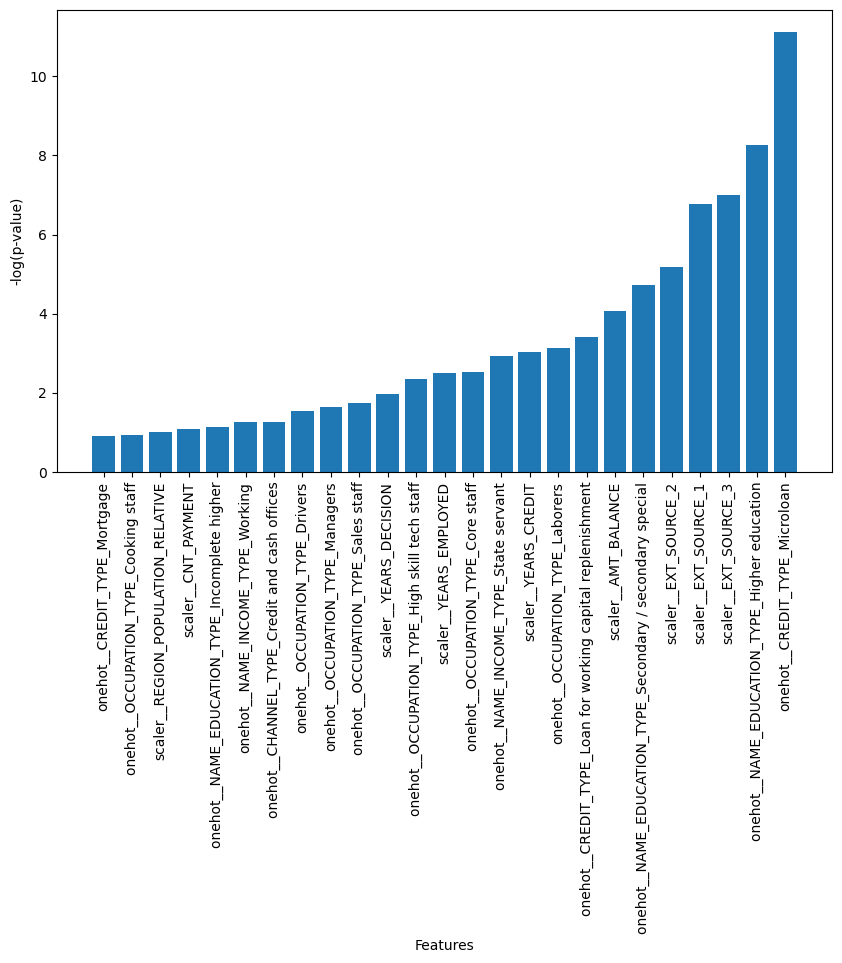

In [43]:
# Get the p-values
p_values = selector.pvalues_
p_values = np.nan_to_num(p_values)

# Sort the features by descending order of -log(p-value)
sorted_idx = (-np.log10(p_values[selector.get_support()])).argsort()

# Plot the sorted p-values
plt.figure(figsize=(10, 6))
plt.bar(selected_features[sorted_idx], -np.log10(p_values[selector.get_support()])[sorted_idx])
plt.xticks(rotation=90)
plt.ylabel('-log(p-value)')
plt.xlabel('Features')
plt.show()

In [44]:
# assume X and y are your feature and target matrices
selector = SelectKBest(chi2, k=25)
X_train_transformed = transformer.fit_transform(X_train)
X_train_selected = selector.fit_transform(X_train_transformed, y_train)
selector.fit(X_train_selected, y_train)

# get the chi2 scores for all the features
chi2_scores = selector.scores_
chi2_scores
# create a pandas dataframe to display the chi2 scores
chi2_df = pd.DataFrame({'Feature': selected_features, 'Chi2 Score': chi2_scores})
chi2_df = chi2_df.sort_values(by='Chi2 Score', ascending=False)
chi2_df

,Feature,Chi2 Score
22,onehot__CREDIT_TYPE_Microloan,46.915155
9,onehot__NAME_EDUCATION_TYPE_Higher education,33.975618
2,scaler__EXT_SOURCE_3,28.335691
0,scaler__EXT_SOURCE_1,27.323490
1,scaler__EXT_SOURCE_2,20.305979
11,onehot__NAME_EDUCATION_TYPE_Secondary / second...,18.338821
8,scaler__AMT_BALANCE,15.370144
21,onehot__CREDIT_TYPE_Loan for working capital r...,12.595353
18,onehot__OCCUPATION_TYPE_Laborers,11.332166
5,scaler__YEARS_CREDIT,11.001424


Berdasarkan hasil Chi-Square test, berikut adalah 10 fitur teratas yang memiliki pengaruh signifikan terhadap target (default payment) dalam dataset:

1. `NAME_EDUCATION`: Semakin tinggi pendidikan seseorang, semakin kecil kemungkinan mereka akan mengalami default. Hal ini dapat disebabkan karena tingkat pendidikan yang lebih tinggi cenderung memiliki pekerjaan yang lebih stabil dan gaji yang lebih tinggi, sehingga lebih mampu membayar tagihan tepat waktu.

2. `EXT_SOURCE_3`: Variabel ini adalah skor kredit dari sumber ketiga, semakin tinggi skornya, semakin rendah kemungkinan default. Ini karena skor kredit yang lebih tinggi menunjukkan kepatuhan yang lebih baik dalam membayar hutang.

3. `EXT_SOURCE_1`: Hal yang sama berlaku untuk variabel ini, semakin tinggi skor kredit, semakin rendah kemungkinan default.

4. `CREDIT_TYPE`: Jenis kredit juga dapat mempengaruhi kemungkinan default. Misalnya, kredit yang diambil untuk modal kerja memiliki risiko default yang lebih rendah daripada kredit yang diambil untuk tujuan konsumsi.

5. `EXT_SOURCE_2`: Seperti variabel skor kredit lainnya, semakin tinggi skor kredit, semakin rendah kemungkinan default.

6. `OCCUPATION_TYPE`: Jenis pekerjaan juga dapat mempengaruhi kemungkinan default. Beberapa pekerjaan memiliki risiko default yang lebih tinggi daripada yang lain, misalnya pekerjaan yang tidak stabil atau dengan gaji rendah.

7. `AMT_BALANCE`: Jumlah saldo yang belum dibayar dapat mempengaruhi kemungkinan default. Semakin tinggi jumlah yang belum dibayar, semakin tinggi risiko default.

8. `YEARS_CREDIT`: Lamanya waktu kredit dapat mempengaruhi kemungkinan default. Semakin lama kredit diberikan, semakin tinggi risiko default.

9. `NAME_INCOME_TYPE`: Jenis penghasilan juga dapat mempengaruhi kemungkinan default. Penghasilan yang stabil dan cukup tinggi cenderung memiliki risiko default yang lebih rendah.

10. `YEARS_EMPLOYED`: Lama masa kerja juga dapat mempengaruhi kemungkinan default. Semakin lama bekerja, semakin rendah risiko default karena memiliki penghasilan yang lebih stabil dan mampu membayar hutang dengan lebih baik.

Fitur-fitur ini akan digunakan dalam membangun model untuk memprediksi kemungkinan default payment pada data nasabah baru.

# Modeling

In [45]:
data = df[['NAME_EDUCATION_TYPE', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'CREDIT_TYPE', 'EXT_SOURCE_2', 'OCCUPATION_TYPE',
           'AMT_BALANCE', 'YEARS_CREDIT', 'NAME_INCOME_TYPE', 'YEARS_EMPLOYED', 'TARGET']].copy()

In [46]:
X = data.drop(columns= ['TARGET'])
y = data['TARGET']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2023, test_size=0.3)

In [48]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

12289 12289
5267 5267


In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

education_map = [{'col': 'NAME_EDUCATION_TYPE', 
                  'mapping': {None: 0, 'Lower secondary': 1, 'Secondary / secondary special': 2, 'Incomplete higher': 3, 
                              'Higher education': 4, 'Academic degree': 5}
                     }]

# fit the transformer to the data and select the top k features based on chi-square test
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_EMPLOYED', 'YEARS_CREDIT',
                                'AMT_BALANCE']),
    ('onehot', OneHotEncoder(drop='first'), ['NAME_INCOME_TYPE']),
    ('binary', ce.BinaryEncoder(), ['OCCUPATION_TYPE', 'CREDIT_TYPE']),
    ('ordinal', ce.OrdinalEncoder(mapping=education_map), ['NAME_EDUCATION_TYPE'])

], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(),
                                 ['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                  'EXT_SOURCE_3', 'YEARS_EMPLOYED',
                                  'YEARS_CREDIT', 'AMT_BALANCE']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['NAME_INCOME_TYPE']),
                                ('binary', BinaryEncoder(),
                                 ['OCCUPATION_TYPE', 'CREDIT_TYPE']),
                                ('ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'NAME_EDUCATION_TYPE',
                                                          'data_type': dtype('O'),
                                                          'mapping': None                             0
Lower secondary                  1
Secondary / secondary special    2
Incomplete higher                3
Higher education                 4
Academic degree                  5
dtype: int64}]),
                                 ['NAME_EDUCATION_TYPE'])])

Pada kode di atas, dilakukan preprocessing data dengan menggunakan ColumnTransformer yang terdiri dari empat transformer, yaitu RobustScaler, OneHotEncoder, BinaryEncoder, dan OrdinalEncoder.

RobustScaler digunakan untuk melakukan scaling pada beberapa feature numerik, yaitu `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`, `YEARS_EMPLOYED`, `YEARS_CREDIT`, dan `AMT_BALANCE`.

OneHotEncoder digunakan untuk melakukan encoding pada feature `NAME_INCOME_TYPE` dengan metode One-Hot Encoding dan menghapus kolom pertama untuk menghindari masalah dummy variable trap.

BinaryEncoder digunakan untuk melakukan encoding pada feature `OCCUPATION_TYPE` dan `CREDIT_TYPE` dengan metode Binary Encoding.

OrdinalEncoder digunakan untuk melakukan encoding pada feature `NAME_EDUCATION_TYPE` dengan metode Ordinal Encoding. Pada kasus ini, dilakukan mapping pada feature `NAME_EDUCATION_TYPE` menggunakan education_map, dimana tiap value pada feature akan diganti dengan value ordinal yang sesuai.

Setelah dilakukan preprocessing, dilakukan seleksi fitur dengan menggunakan SelectKBest dan chi2 untuk memilih top k feature dengan nilai chi-square terbesar dari data yang telah di-preprocessing.

In [56]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, confusion_matrix
from imblearn.over_sampling import ADASYN

In [57]:
# Models
logreg=LogisticRegression(random_state=2023)
KNN=KNeighborsClassifier(n_neighbors=5)
Tree=DecisionTreeClassifier(random_state=2023)
forest=RandomForestClassifier(random_state=2023)
lgbm=LGBMClassifier(random_state=2023)
gboost=GradientBoostingClassifier(random_state=2023)
adaboost=AdaBoostClassifier(random_state=2023)
xgboost=XGBClassifier(random_state=2023)

# OverSampling
ros = RandomOverSampler(random_state=2023)
smote = SMOTE(random_state=2023)
adasyn = ADASYN(random_state=2023)

# UnderSampling
rus = RandomUnderSampler(random_state=2023)
nearmiss = NearMiss()

# Kfold
skfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

### Benchmark Model

Dalam Benchmarking model, terdapat beberapa evaluasi metriks yang bisa digunakan seperti:
- `ROC AUC`: Metrik evaluasi yang mengukur seberapa baik model dalam membedakan kelas positif dan negatif, yaitu reservasi yang dibatalkan dan yang tidak dibatalkan, pada berbagai threshold. Nilai ROC AUC semakin dekat dengan 1, semakin baik kemampuan model dalam membedakan kelas tersebut.

- `Balanced Accuracy`: Metrik evaluasi yang mengukur seberapa baik model dalam memprediksi kedua kelas dengan seimbang. Nilai balanced accuracy semakin dekat dengan 1, semakin baik kemampuan model dalam memprediksi kedua kelas dengan seimbang.

- `Accuracy`: Metrik evaluasi yang mengukur seberapa banyak prediksi model yang benar dibandingkan dengan total jumlah prediksi. Nilai accuracy semakin dekat dengan 1, semakin baik kemampuan model dalam memprediksi dengan benar.

- `Recall`: Metrik evaluasi yang mengukur seberapa banyak data aktual kelas positif (reservasi yang dibatalkan) yang berhasil diidentifikasi dengan benar oleh model. Nilai recall semakin dekat dengan 1, semakin baik kemampuan model dalam mengidentifikasi data kelas positif.

- `Precision`: Metrik evaluasi yang mengukur seberapa banyak data yang diprediksi kelas positif oleh model yang sebenarnya benar. Nilai precision semakin dekat dengan 1, semakin sedikit data yang salah diklasifikasikan oleh model sebagai kelas positif.

- `F1 Score`: Metrik evaluasi yang menggabungkan precision dan recall dengan mengambil rata-rata harmonik antara keduanya. F1 score semakin dekat dengan 1, semakin baik kemampuan model dalam mengidentifikasi dan memprediksi data dengan benar.



**Without Resampling**

In [58]:
# Tanpa Resampling
from sklearn.metrics import balanced_accuracy_score

models = [logreg, Tree, forest, lgbm, gboost, adaboost, xgboost]
score = []
rata = []
std = []
acc = []
rec = []
prec = []
f1 = []
ba = []

for i in models:
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)
    ])
    model_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    # std.append(model_cv.std())
    acc_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='accuracy')
    acc.append(acc_cv.mean())
    rec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall')
    rec.append(rec_cv.mean())
    prec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='precision')
    prec.append(prec_cv.mean())
    f1_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='f1')
    f1.append(f1_cv.mean())
    ba_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='balanced_accuracy')
    ba.append(ba_cv.mean())

metrics_df = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LGBM', 'GBoost', 'AdaBoost', 'XGBoost'],
    'mean roc_auc': rata,
    'mean accuracy': acc,
    'mean recall': rec,
    'mean precision': prec,
    'mean f1 score': f1,
    'mean balanced accuracy': ba
}).set_index('model').sort_values(by='mean recall', ascending=False)

metrics_df

,mean roc_auc,mean accuracy,mean recall,mean precision,mean f1 score,mean balanced accuracy
model,,,,,,
Decision Tree,0.519631,0.858084,0.122793,0.104269,0.112400,0.519631
XGBoost,0.678070,0.921719,0.030994,0.247103,0.054917,0.511720
AdaBoost,0.717023,0.926357,0.021031,0.471111,0.040180,0.509637
LGBM,0.704261,0.924485,0.019914,0.313333,0.037116,0.508112
GBoost,0.720145,0.925136,0.018803,0.328297,0.035253,0.507952
Random Forest,0.698814,0.926682,0.015488,0.589048,0.030121,0.507261
Logistic Regression,0.733801,0.926276,0.004420,0.300000,0.008615,0.501946


Tabel di atas menunjukkan hasil evaluasi performa model menggunakan beberapa metrik seperti ROC AUC, akurasi, recall, precision, F1 score, dan balanced accuracy. Terdapat 7 model yang dievaluasi dan Logistic Regression menunjukkan kinerja terbaik dengan nilai ROC AUC tertinggi (0.733) dan akurasi (0.926). Namun, model Logistic Regression memiliki recall yang rendah (0.004) yang menunjukkan bahwa model tersebut kurang baik dalam memprediksi kelas positif. Sedangkan model yang lainnya menunjukkan kinerja yang kurang baik dengan nilai recall dan precision yang rendah.

**Using Random Oversampling**

In [59]:
# Ros
from sklearn.metrics import balanced_accuracy_score

models = [logreg, Tree, forest, lgbm, gboost, adaboost, xgboost]
score = []
rata = []
std = []
acc = []
rec = []
prec = []
f1 = []
ba = []

for i in models:
    estimator = Pipeline([
        ('preprocess', transformer),
        ('resample', ros),
        ('model', i)
    ])
    model_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    # std.append(model_cv.std())
    acc_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='accuracy')
    acc.append(acc_cv.mean())
    rec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall')
    rec.append(rec_cv.mean())
    prec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='precision')
    prec.append(prec_cv.mean())
    f1_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='f1')
    f1.append(f1_cv.mean())
    ba_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='balanced_accuracy')
    ba.append(ba_cv.mean())

metrics_df = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LGBM', 'GBoost', 'AdaBoost', 'XGBoost'],
    'mean roc_auc': rata,
    'mean accuracy': acc,
    'mean recall': rec,
    'mean precision': prec,
    'mean f1 score': f1,
    'mean balanced accuracy': ba
}).set_index('model').sort_values(by='mean recall', ascending=False)

metrics_df

,mean roc_auc,mean accuracy,mean recall,mean precision,mean f1 score,mean balanced accuracy
model,,,,,,
Logistic Regression,0.732928,0.675645,0.662676,0.139838,0.230928,0.669678
AdaBoost,0.719062,0.681178,0.626176,0.136412,0.223989,0.655863
GBoost,0.716671,0.707706,0.611793,0.145703,0.235324,0.663560
LGBM,0.692936,0.807714,0.386096,0.161743,0.227944,0.613645
XGBoost,0.659168,0.859061,0.213511,0.159551,0.182515,0.561916
Decision Tree,0.527672,0.869152,0.127281,0.123057,0.125078,0.527672
Random Forest,0.690297,0.924160,0.030982,0.358154,0.056754,0.513032


Dilihat dari metrik evaluasi prioritas, yaitu ROC AUC dan recall, terlihat bahwa terdapat penurunan nilai ROC AUC di Tabel 2 dibandingkan dengan Tabel 1 untuk semua model, kecuali untuk Decision Tree. Namun, terdapat peningkatan nilai recall di Tabel 2 untuk semua model kecuali untuk Decision Tree dan XGBoost.

Hal ini menunjukkan bahwa penggunaan teknik oversampling dalam dengan menggunakan Random Oversampling dapat meningkatkan kemampuan model dalam memprediksi kelas minoritas, yang direpresentasikan dengan peningkatan nilai recall. Namun, perlu dicatat bahwa peningkatan nilai recall tidak selalu diikuti dengan peningkatan nilai ROC AUC

**Using Random Undersampling**

In [60]:
# Rus
from sklearn.metrics import balanced_accuracy_score

models = [logreg, Tree, forest, lgbm, gboost, adaboost, xgboost]
score = []
rata = []
std = []
acc = []
rec = []
prec = []
f1 = []
ba = []

for i in models:
    estimator = Pipeline([
        ('preprocess', transformer),
        ('resample', rus),
        ('model', i)
    ])
    model_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    # std.append(model_cv.std())
    acc_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='accuracy')
    acc.append(acc_cv.mean())
    rec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall')
    rec.append(rec_cv.mean())
    prec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='precision')
    prec.append(prec_cv.mean())
    f1_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='f1')
    f1.append(f1_cv.mean())
    ba_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='balanced_accuracy')
    ba.append(ba_cv.mean())

metrics_df = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LGBM', 'GBoost', 'AdaBoost', 'XGBoost'],
    'mean roc_auc': rata,
    'mean accuracy': acc,
    'mean recall': rec,
    'mean precision': prec,
    'mean f1 score': f1,
    'mean balanced accuracy': ba
}).set_index('model').sort_values(by='mean recall', ascending=False)

metrics_df

,mean roc_auc,mean accuracy,mean recall,mean precision,mean f1 score,mean balanced accuracy
model,,,,,,
Logistic Regression,0.728951,0.678655,0.664880,0.141433,0.233218,0.672317
AdaBoost,0.707182,0.656195,0.653818,0.131239,0.218536,0.655104
LGBM,0.684383,0.633655,0.648244,0.122911,0.206594,0.640372
GBoost,0.712467,0.649605,0.647188,0.127740,0.213300,0.648495
Random Forest,0.707986,0.659776,0.637219,0.129923,0.215772,0.649396
XGBoost,0.665469,0.623484,0.617281,0.115165,0.194076,0.620630
Decision Tree,0.580346,0.580031,0.580718,0.098865,0.168952,0.580346


Pada tabel yang baru tersebut, terlihat bahwa metrik ROC AUC dan recall meningkat secara keseluruhan dibandingkan dengan tabel sebelumnya dengan random oversampling. Namun, tetap saja performa model yang dievaluasi kurang baik, terutama untuk metrik precision dan F1 score. Hal ini menunjukkan bahwa masih dibutuhkan peningkatan performa model dalam memprediksi kelas positif.

Pada tabel baru tersebut, dilakukan random undersampling yang dapat membantu menyeimbangkan dataset sehingga meminimalkan dampak dari ketidakseimbangan kelas pada performa model. Namun, perlu diperhatikan bahwa random undersampling juga dapat menyebabkan kehilangan informasi yang penting dari dataset yang awalnya tidak seimbang. 

## Predict Baseline Model

### Using Random Oversampling

LogisticRegression
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      4880
           1       0.15      0.70      0.24       387

    accuracy                           0.68      5267
   macro avg       0.56      0.69      0.52      5267
weighted avg       0.91      0.68      0.76      5267

Confusion Matrix:


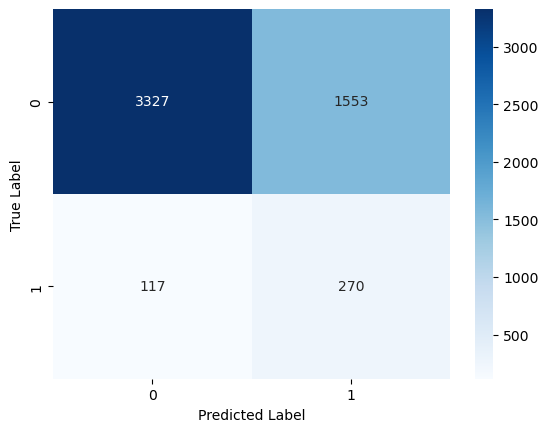

ROC AUC Score: 0.7522535688566951
Balanced Acc: 0.6897183568433092


AdaBoostClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.69      0.81      4880
           1       0.15      0.67      0.24       387

    accuracy                           0.69      5267
   macro avg       0.56      0.68      0.53      5267
weighted avg       0.90      0.69      0.77      5267

Confusion Matrix:


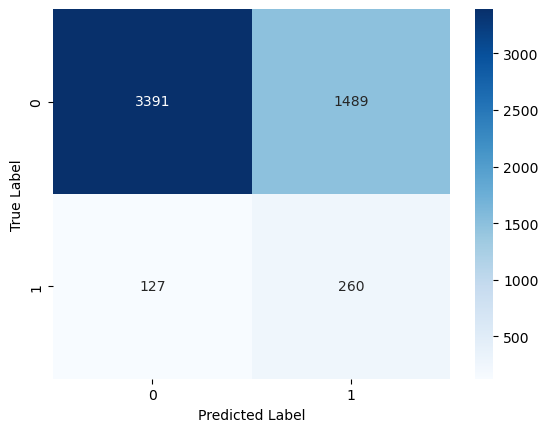

ROC AUC Score: 0.7453835197187275
Balanced Acc: 0.6833558372516626




In [61]:
# Define models
models = [logreg, adaboost]

# Loop through models
for model in models:
    # Define pipeline
    estimator = Pipeline([
        ('preprocess', transformer),
        ('resample', ros),
        ('model', model)
    ])
    
    # Fit model and make predictions
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    y_pred_proba = estimator.predict_proba(X_test)[:, 1]
    
    # Generate evaluation metrics
    print(model.__class__.__name__)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))
    print('Balanced Acc:', balanced_accuracy_score(y_test, y_pred))
    print('\n')

### Using Random Undersampling

LogisticRegression
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      4880
           1       0.14      0.69      0.24       387

    accuracy                           0.68      5267
   macro avg       0.55      0.68      0.52      5267
weighted avg       0.90      0.68      0.75      5267

Confusion Matrix:


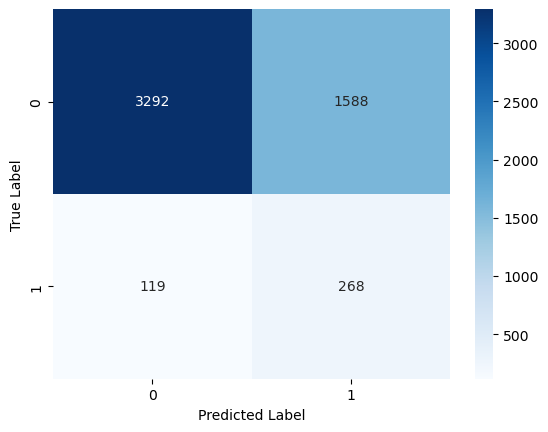

ROC AUC Score: 0.7477877324522387
Balanced Acc: 0.6835483119413733


AdaBoostClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      4880
           1       0.14      0.69      0.23       387

    accuracy                           0.66      5267
   macro avg       0.55      0.67      0.51      5267
weighted avg       0.90      0.66      0.74      5267

Confusion Matrix:


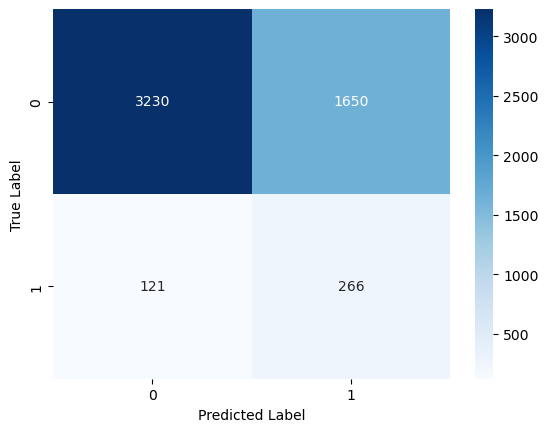

ROC AUC Score: 0.7389439573008005
Balanced Acc: 0.6746118735968145


LGBMClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.64      0.77      4880
           1       0.12      0.65      0.21       387

    accuracy                           0.64      5267
   macro avg       0.54      0.64      0.49      5267
weighted avg       0.90      0.64      0.73      5267

Confusion Matrix:


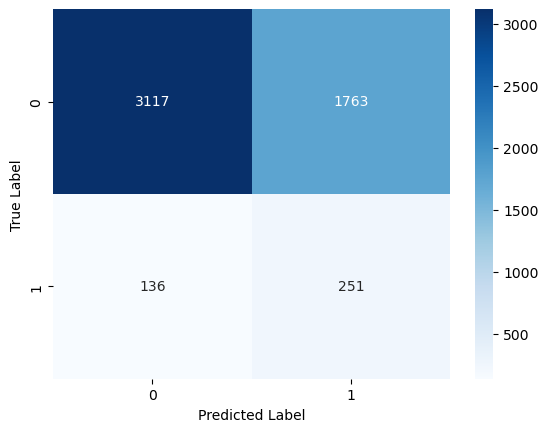

ROC AUC Score: 0.6947483797178804
Balanced Acc: 0.6436541597831151




In [62]:
# Define models
models = [logreg, adaboost, lgbm]

# Loop through models
for model in models:
    # Define pipeline
    estimator = Pipeline([
        ('preprocess', transformer),
        ('resample', rus),
        ('model', model)
    ])
    
    # Fit model and make predictions
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    y_pred_proba = estimator.predict_proba(X_test)[:, 1]
    
    # Generate evaluation metrics
    print(model.__class__.__name__)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))
    print('Balanced Acc:', balanced_accuracy_score(y_test, y_pred))
    print('\n')

Dari perbandingan kedua model diatas didapatkan bahwa, pada Logistic Regression dengan Random Oversampling menghasilkan nilai ROC AUC serta Recall yang lebih tinggi dibandingkan model-lainnya. Sehingga dengan demikian kita akan melakukan hyperparameter tuning dengan menggunakan algoritma Logistic Regression dengan Random Oversampling, untuk menghasilkan output yang optimal.

**Oversampling**

| Model  | ROC AUC | Recall       |
|-------|------|------------|
| Logreg  | 0.7522535688566951   | 0.70   |
| AdaBoost | 0.7453835197187275   | 0.67 |

**Undersampling**

| Model  | ROC AUC | Balanced Acc       |
|-------|------|------------|
| Logreg  | 0.7389439573008005   | 0.69   |
| LGBM | 0.6947483797178804   | 0.65 |


Berdasarkan hasil pengujian dengan membandingkan beberapa model dengan menggunakan oversampling / undersampling / tanpa sampling, didapatkan bahwa nilai ROC AUC dan Balanced Accuracy terbaik berada pada model Logistic Regression dengan Random Over Sampling dengan nilai sebesar:

**Logistic Regression Using Random Oversampling**
- `ROC AUC`: **0.752**
- `Recall`: **0.7**

**Apa itu Logistic Regression dan Bagaimana Kerja-nya?**

Logistic Regression (Regresi Logistik) adalah salah satu teknik dalam statistika dan machine learning untuk memprediksi sebuah variabel biner (0 atau 1) berdasarkan beberapa variabel independen (predictor). Dalam Logistic Regression, output atau hasil prediksi adalah probabilitas kelas positif (1) berdasarkan input variabel independen.

Cara kerja Logistic Regression adalah dengan menggunakan fungsi logit atau sigmoid untuk memetakan input variabel independen ke dalam output probabilitas kelas positif. Fungsi logit adalah fungsi matematis yang mengubah input dalam rentang nilai negatif dan positif tak terbatas ke dalam rentang nilai antara 0 dan 1, yang merepresentasikan probabilitas kelas positif.

<img src="https://pimages.toolbox.com/wp-content/uploads/2022/04/11040522/46-4.png" width="500" height="500">


Logistic Regression adalah salah satu teknik yang umum digunakan dalam berbagai bidang seperti kesehatan, ekonomi, dan pemasaran untuk memprediksi kejadian yang bersifat biner seperti penyakit, pembelian produk, dan lain sebagainya.

## Hyperparameter

GridSearchCV adalah salah satu teknik untuk melakukan hyperparameter tuning pada suatu model machine learning. GridSearchCV bekerja dengan melakukan pencarian parameter terbaik pada suatu model machine learning dengan cara melakukan iterasi pada setiap kombinasi parameter yang diberikan sebagai input pada model. Kemudian, model akan dijalankan pada setiap kombinasi parameter tersebut dengan menggunakan metrik evaluasi tertentu yang ditentukan oleh pengguna (dalam kasus ini roc_auc).

Dalam kode di atas, hyperparameter tuning dilakukan pada model logistic regression (logreg) dengan menggunakan GridSearchCV. Proses tuning ini dilakukan dengan membuat sebuah pipeline (pipe_model) yang terdiri dari tiga tahapan: preprocessing (transformer), resampling (ros), dan modeling (logreg). Kemudian, hyperparameter tuning dilakukan dengan menggabungkan pipeline tersebut dengan hyperparameter yang diberikan pada variabel hyperparam.

GridSearchCV kemudian melakukan cross-validation (cv=5) pada setiap kombinasi hyperparameter yang diberikan dan menghitung nilai metrik evaluasi roc_auc. Setelah itu, GridSearchCV akan mengembalikan hyperparameter terbaik yang memberikan nilai metrik evaluasi terbaik pada model.

Dalam kasus ini, kode tersebut akan mengembalikan model logistic regression terbaik dengan hyperparameter terbaik berdasarkan roc_auc score.

In [63]:
# GridSearchCV

%time
# algo (benchmark model)
model = logreg

# pipeline
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('resample', ros),
    ('modeling', model)
])

# hyperparameter # modeling__ agar menghindari error, karena kita akan hyperparameter pada model
hyperparam = {'modeling__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'modeling__penalty': ['l1', 'l2'],
              'modeling__solver': ['lbfgs', 'liblinear', 'saga']}


gridsearch_logreg = GridSearchCV(
                estimator=pipe_model,                  # model yang mau di tuning
                param_grid = hyperparam,               # Hyperparameter
                cv = 5,                                # 10 fold cross validation
                scoring='roc_auc',    
                n_jobs=-1                              # memaksimalkan processor
            )

# fit
gridsearch_logreg.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         RobustScaler(),
                                                                         ['EXT_SOURCE_1',
                                                                          'EXT_SOURCE_2',
                                                                          'EXT_SOURCE_3',
                                                                          'YEARS_EMPLOYED',
                                                                          'YEARS_CREDIT',
                                                                          'AMT_BALANCE']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['NAME_INCOME_TYPE']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['OCCUPATION_TYPE',
                                                                          'CREDIT_T...
Incomplete higher                3
Higher education                 4
Academic degree                  5
dtype: int64}]),
                                                                         ['NAME_EDUCATION_TYPE'])])),
                                       ('resample',
                                        RandomOverSampler(random_state=2023)),
                                       ('modeling',
                                        LogisticRegression(random_state=2023))]),
             n_jobs=-1,
             param_grid={'modeling__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'modeling__penalty': ['l1', 'l2'],
                         'modeling__solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='roc_auc')

In [64]:
gridsearch_logreg.best_params_

{'modeling__C': 0.01,
 'modeling__penalty': 'l1',
 'modeling__solver': 'liblinear'}

LogisticRegression
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      4880
           1       0.15      0.71      0.25       387

    accuracy                           0.69      5267
   macro avg       0.56      0.69      0.52      5267
weighted avg       0.91      0.69      0.76      5267

Confusion Matrix:


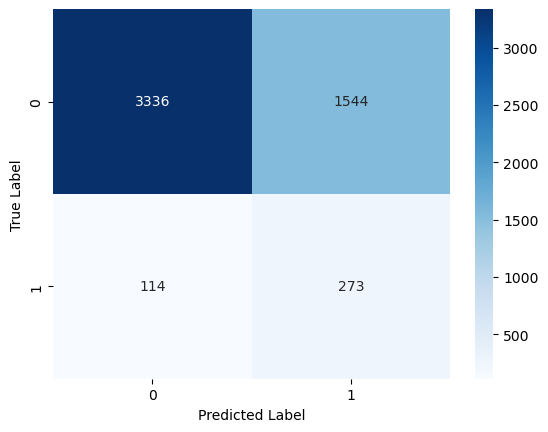

ROC AUC Score: 0.7557159952556446
Balanced Score: 0.6945164569830983




In [65]:
# Define model and pipeline
model = LogisticRegression(C=0.01,
                           penalty= 'l1',
                           solver= 'liblinear')

estimator = Pipeline([
    ('preprocess', transformer),
    ('resample', ros),
    ('model', model)
])

# Fit model and make predictions
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]

# Generate evaluation metrics
print(model.__class__.__name__)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))
print('Balanced Score:', balanced_accuracy_score(y_test, y_pred))
print('\n')

Berdasarkan nilai ROC AUC sebesar 0.755 dan recall sebesar 0.71, dapat disimpulkan bahwa model memiliki kinerja yang cukup baik dalam memprediksi risiko default pada home credit. Namun, nilai precision sebesar 0.15 menunjukkan bahwa terdapat banyak false positive (prediksi positif yang salah) dalam model.

Hal ini bisa terjadi karena beberapa faktor seperti ketidakseimbangan antara kelas default dan non-default dalam data atau kekurangan informasi dalam data yang digunakan untuk melatih model. Solusinya bisa dengan mengambil langkah-langkah seperti oversampling atau undersampling untuk mengatasi ketidakseimbangan data, atau menambahkan fitur-fitur baru untuk meningkatkan kualitas informasi yang dimiliki oleh model. Selain itu, penggunaan algoritma yang lebih kompleks atau teknik ensemble learning dapat membantu meningkatkan kinerja model secara keseluruhan.

# Conclusion

## Kesimpulan

**Bisnis**  
Berikut adalah beberapa solusi yang dapat dilakukan perusahaan untuk meminimalisir potensi default risk berdasarkan variabel yang telah disebutkan:

1. Pendidikan: Perusahaan dapat mempertimbangkan untuk memberikan diskon bunga atau pinjaman dengan syarat yang lebih baik kepada nasabah yang memiliki pendidikan yang lebih tinggi.

2. Skor kredit: Perusahaan dapat menentukan syarat pinjaman yang lebih ketat untuk nasabah dengan skor kredit rendah. Selain itu, perusahaan juga dapat memberikan penghargaan kepada nasabah dengan skor kredit yang tinggi dengan memberikan diskon bunga atau syarat yang lebih baik.

3. Jenis kredit: Perusahaan dapat mempertimbangkan untuk membatasi jenis kredit tertentu yang memiliki risiko default yang lebih tinggi. Misalnya, perusahaan dapat membatasi pemberian kredit konsumsi dan hanya fokus pada kredit modal kerja.

4. Pekerjaan: Perusahaan dapat mempertimbangkan jenis pekerjaan nasabah sebagai faktor penilaian dalam memberikan kredit. Misalnya, perusahaan dapat memperketat syarat pemberian kredit untuk nasabah yang memiliki jenis pekerjaan dengan risiko default yang lebih tinggi.

5. Saldo yang belum dibayar: Perusahaan dapat mempertimbangkan untuk menawarkan pembayaran cicilan yang lebih fleksibel untuk nasabah yang memiliki saldo yang belum dibayar yang besar.

6. Lama waktu kredit: Perusahaan dapat mempertimbangkan untuk memperpendek jangka waktu kredit agar risiko default dapat diminimalisir.

7. Jenis penghasilan: Perusahaan dapat mempertimbangkan jenis penghasilan nasabah sebagai faktor penilaian dalam memberikan kredit. Misalnya, perusahaan dapat memberikan syarat kredit yang lebih baik kepada nasabah dengan penghasilan yang stabil dan cukup tinggi.

8. Masa kerja: Perusahaan dapat mempertimbangkan masa kerja nasabah sebagai faktor penilaian dalam memberikan kredit. Misalnya, perusahaan dapat memberikan syarat kredit yang lebih baik kepada nasabah dengan masa kerja yang lebih lama karena memiliki penghasilan yang lebih stabil.

**Model**  
Nilai ROC AUC dan recall menunjukkan seberapa baik model dapat membedakan antara kelas default dan non-default. Nilai ROC AUC sebesar 0.755 menunjukkan bahwa model memiliki kemampuan yang cukup baik dalam membedakan antara kelas default dan non-default, dengan 0.5 sebagai nilai ROC AUC yang biasa digunakan sebagai baseline. Namun, nilai ini tidak menjelaskan seberapa akurat model dalam memprediksi kelas default.

Sementara itu, nilai recall sebesar 0.71 menunjukkan bahwa model mampu mengidentifikasi 71% dari total kasus default yang ada di dataset. Namun, nilai precision sebesar 0.15 menunjukkan bahwa dari seluruh prediksi default yang dilakukan oleh model, hanya 15% yang benar-benar merupakan kasus default. Artinya, sebagian besar prediksi default yang dilakukan oleh model adalah false positive, yang dapat menyebabkan kerugian finansial bagi perusahaan.

Dalam konteks risiko default, model yang memiliki nilai recall yang tinggi penting untuk mengidentifikasi sebanyak mungkin kasus default yang ada. Namun, model juga harus memiliki nilai precision yang tinggi untuk meminimalkan false positive dan mencegah perusahaan memberikan kredit kepada peminjam yang berisiko tinggi. Oleh karena itu, perlu dilakukan peningkatan terhadap precision agar model dapat memberikan prediksi yang lebih akurat dan mengurangi risiko default pada perusahaan.

**Saran**  
Untuk meningkatkan hasil output yang dihasilkan maka, dapat dilakukan eksperimen kembali dengan mempertimbangkan hal hal dibawah ini:

- Menggunakan teknik undersampling atau oversampling untuk mengatasi ketidakseimbangan kelas (class imbalance) pada dataset. Hal ini dapat membantu mengurangi jumlah false positive pada model.

- Melakukan feature selection untuk memilih fitur-fitur yang paling penting dalam memprediksi risiko default. Dengan demikian, model dapat difokuskan pada fitur-fitur yang benar-benar berpengaruh dan mengurangi kecenderungan overfitting pada model.

- Meningkatkan kualitas data dengan membersihkan dan menghilangkan outlier serta missing value pada dataset. Hal ini dapat membantu mengurangi noise pada data dan memperbaiki kinerja model.

- Menggunakan teknik regularisasi seperti L1 atau L2 regularization pada model regresi logistik. Hal ini dapat membantu mengurangi koefisien dari fitur-fitur yang kurang penting dan meningkatkan interpretabilitas model.

- Menggunakan teknik ensemble learning seperti Random Forest atau Gradient Boosting untuk mengkombinasikan beberapa model dan meningkatkan akurasi serta precision pada model.